# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [1]:
# importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')

In [3]:
# mostrar las primeras 5 filas de plans
plans.head(5)

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [4]:
# mostrar las primeras 5 filas de users
users.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [5]:
# mostrar las primeras 5 filas de usage
usage.head(5)

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [6]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [7]:
# inspección de plans con .info()
print("Tabla plans:")
plans.info()

Tabla plans:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [8]:
# inspección de users con .info()
print("Tabla users:")
users.info()

Tabla users:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [9]:
# inspección de usage con .info(
print("Tabla usage:")
usage.info()

Tabla usage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [10]:
# cantidad de nulos para users
print("Columnas con nulos en users:")
print(users[["user_id","first_name","last_name","age","city","reg_date","plan","churn_date"]].isna().sum())
print("Proporción de columnas con nulos de users:")
print(users[["user_id","first_name","last_name","age","city","reg_date","plan","churn_date"]].isna().mean())

Columnas con nulos en users:
user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64
Proporción de columnas con nulos de users:
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [11]:
# cantidad de nulos para usage
print("Columnas con nulos en usage:")
print(usage[["id","user_id","type","date","duration","length"]].isna().sum())
print("Proporción de columnas con nulos de usage:")
print(usage[["id","user_id","type","date","duration","length"]].isna().mean())

Columnas con nulos en usage:
id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
Proporción de columnas con nulos de usage:
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:


 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?  
- Indica qué harías: ¿imputar, eliminar, ignorar?
* Tabla users: la columna churn_date tiene 88% de valores nulos por lo que esta columna se ignora.
* Tabla users: la columna city tiene 11% de nulos, buscaremos si hay relación con el tipo de plan o edad para reportarlo e imputaremos el valor mas probable.

* Tabla usage: la columna duration tiene mas del 55 % de valores nulos, buscaremos si hay relación con el tipo de plan o usuario o se pueda imputar un valor.
* Tabla usage: la columna length tiene mas del 44% de valores nulos, tambien se buscara si hay relación con alguna columna y si se puede imputar un valor.

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [12]:
# explorar columnas numéricas de users:  user_id age
print(users[['user_id', 'age']].describe())
print("")
print(users['age'].le(0).sum())
print("")
users["age"].value_counts().sort_index(ascending=True)

            user_id          age
count   4000.000000  4000.000000
mean   11999.500000    33.739750
std     1154.844867   123.232257
min    10000.000000  -999.000000
25%    10999.750000    32.000000
50%    11999.500000    47.000000
75%    12999.250000    63.000000
max    13999.000000    79.000000

55



-999    55
 18     65
 19     65
 20     64
 21     57
        ..
 75     62
 76     61
 77     58
 78     79
 79     59
Name: age, Length: 63, dtype: int64

- La columna `user_id` Se ve correcta y cumple como llave única de identificación de usuario.
- La columna `age`  se encontraron 55 valores sentinels, los cuales se puede imputar la media o mediana.

In [13]:
# explorar columnas numéricas de usage
usage[["id","user_id"]].describe() 

,id,user_id
count,40000.00000,40000.000000
mean,20000.50000,12002.405975
std,11547.14972,1157.279564
min,1.00000,10000.000000
25%,10000.75000,10996.000000
50%,20000.50000,12013.000000
75%,30000.25000,13005.000000
max,40000.00000,13999.000000


- Las columnas `id` y `user_id`...Haz doble clic en este bloque y escribe qué ves.
- Las columnas `id` y `user_id` ambas muestran datos concistentes con su función de identificadores únicos

In [14]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
for col in columnas_user:
    print(users[[col]].describe())
print("")
print(users["city"].value_counts().sort_values(ascending=True))
print("")
print(users['city'].isna().sum())

          city
count     3531
unique       7
top     Bogotá
freq       808
          plan
count     4000
unique       2
top     Basico
freq      2595

?            96
MTY         407
Cali        424
GDL         450
Medellín    616
CDMX        730
Bogotá      808
Name: city, dtype: int64

469


- La columna `city` tiene 469 nulos y 96 valores sentinels "?" y estos datos invalidos representan el 14% del total de registros.
- La columna `plan` No presenta problema de valores invalidos siendo el plan básico el mas utilizado con 2,595 de 4,000 usuarios.

In [15]:
# explorar columna categórica de usage
#usage['type'] # completa el código
print(usage[["type"]].describe())
print("")
print(usage["type"].value_counts().sort_values(ascending=True))
print("")
print(usage['type'].isna().sum())

         type
count   40000
unique      2
top      text
freq    22092

call    17908
text    22092
Name: type, dtype: int64

0


- La columna `type` no muestra valores invalidos o sentinels, el tipo muestra que es ligeramente mayor el uso de datos que llamadas.


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?
     Se encontro valores nulos y sentinels en la columna city de la tabla users. 
- ¿Qué acción tomarías?
     Si no representa un campo importante para el análisis y tomando en cuenta el porcentaje de valores invalidos, de momento se ignora.

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [16]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users["reg_date"], errors="coerce")
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     4000 non-null   int64         
 1   first_name  4000 non-null   object        
 2   last_name   4000 non-null   object        
 3   age         4000 non-null   int64         
 4   city        3531 non-null   object        
 5   reg_date    4000 non-null   datetime64[ns]
 6   plan        4000 non-null   object        
 7   churn_date  466 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 250.1+ KB


In [17]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage["date"], errors="coerce")
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        40000 non-null  int64         
 1   user_id   40000 non-null  int64         
 2   type      40000 non-null  object        
 3   date      39950 non-null  datetime64[ns]
 4   duration  17924 non-null  float64       
 5   length    22104 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 1.8+ MB


In [18]:
# Revisar los años presentes en `reg_date` de users
users.groupby(users['reg_date'].dt.year).size()

reg_date
2022    1314
2023    1316
2024    1330
2026      40
dtype: int64

En `reg_date`, ... tiene registro de varios años, incluyento 40 de 2026 que son un error.

In [19]:
# Revisar los años presentes en `date` de usage
print(usage.groupby(usage['date'].dt.year).size())
print(usage['date'].isna().sum())
print(usage.groupby(usage['date'].dt.month).size())

date
2024.0    39950
dtype: int64
50
date
1.0    6843
2.0    6403
3.0    6837
4.0    6622
5.0    6843
6.0    6402
dtype: int64


En `date`, ... existen 50 registros con date en nulo, sin embargo el resto de información es util pues corresponde a 6 meses del 2024.  
Basaremos el análisis en estas fechas.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
  --En users la reg_date si tiene años pasados (2022 u 2023) y claramente algunos registros con año erroneo 2026.
  --En usage.date hay 50 registros nulos. dado que la información toda es de 2024, se pueden incluir en el análisis global o ignorar si segmentamos por mes
- ¿Qué harías con ellas?
  --En user.reg_date Se usarian para el análisis, al menos que solo en especifico nos interesen los usuarios dados de alta en 2024.
  --En usage.date, dado que la información toda es de 2024, se pueden incluir en el análisis global o ignorar si segmentamos por mes.

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [20]:
# Reemplazar -999 por la mediana de age
age_mediana = users['age'].median()
users['age'] = users['age'].replace(-999, age_mediana)

# Verificar cambios
print(users['age'].describe())

count    4000.000000
mean       48.122250
std        17.690408
min        18.000000
25%        33.000000
50%        47.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64


In [21]:
# Reemplazar ? por NA en city
users['city'] = users['city'].replace("?", pd.NA)

# Verificar cambios
print(users["city"].value_counts().sort_values(ascending=True))
print("")
print(users['city'].describe())

MTY         407
Cali        424
GDL         450
Medellín    616
CDMX        730
Bogotá      808
Name: city, dtype: int64

count       3435
unique         6
top       Bogotá
freq         808
Name: city, dtype: object


In [22]:
# Marcar fechas futuras como NA para reg_date
users.loc[users['reg_date'] > '2024-12-31', 'reg_date'] = pd.NaT

# Verificar cambios
print(users['reg_date'].describe())
print("")
users.groupby(users['reg_date'].dt.year).size()

count                              3960
unique                             3960
top       2024-06-27 06:08:22.325581392
freq                                  1
first               2022-01-01 00:00:00
last                2024-12-31 00:00:00
Name: reg_date, dtype: object



reg_date
2022.0    1314
2023.0    1316
2024.0    1330
dtype: int64

### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [23]:
# Verificación MAR en usage (Missing At Random) para duration

usage["duration"].isna().groupby(usage["type"]).sum()


type
call        0
text    22076
Name: duration, dtype: int64

In [24]:
# Verificación MAR en usage (Missing At Random) para length
usage["length"].isna().groupby(usage["type"]).sum()


type
call    17896
text        0
Name: length, dtype: int64

Haz doble clic aquíy escribe que tu diagnostico de nulos en `duration` y `length` 

Se puede concluir que ambos campos son tipo MAR, dado que depende que tenga valor uno u otro campo, según valor del campo type, por ejemplo si se trata de un registro tipo "call" el campo "duration" no presenta nulos pero el de "lenth" si, si se trata de un sevicio tipo "text", el campo "length" no tiene nulos pero "duration" si.

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [25]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario
#usage_agg = usage ... reset_index()
usage_agg = usage.groupby('user_id') [['is_text', 'is_call', 'duration']].sum().reset_index()

# observar resultado
usage_agg.head(5)

,user_id,is_text,is_call,duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74
3,10003,11,3,8.99
4,10004,4,3,8.01


In [26]:
# Renombrar columnas
usage_agg = usage_agg.rename(columns={
    'is_text': 'cant_mensajes',
    'is_call': 'cant_llamadas',
    'duration': 'cant_minutos_llamada'
})
# observar resultado
print(usage_agg.shape)
usage_agg.head(3)

(3999, 4)


,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [27]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = users.merge(
    usage_agg,
    on='user_id',
    how='inner'
)


user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7,3,23.70
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5,10,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5,2,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11,3,8.99
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4,3,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [28]:
# Resumen estadístico de las columnas numéricas
columnas_numericas=['age','reg_date','churn_date','cant_mensajes','cant_llamadas','cant_minutos_llamada']
print(user_profile[columnas_numericas].describe())
print("")
print("mediana:\n",user_profile[columnas_numericas].median())

               age  cant_mensajes  cant_llamadas  cant_minutos_llamada
count  3999.000000    3999.000000    3999.000000           3999.000000
mean     48.124531       5.524381       4.478120             23.317054
std      17.692032       2.358416       2.144238             18.168095
min      18.000000       0.000000       0.000000              0.000000
25%      33.000000       4.000000       3.000000             11.120000
50%      47.000000       5.000000       4.000000             19.780000
75%      63.000000       7.000000       6.000000             31.415000
max      79.000000      17.000000      15.000000            155.690000

mediana:
 age                     47.00
cant_mensajes            5.00
cant_llamadas            4.00
cant_minutos_llamada    19.78
dtype: float64


In [29]:
# Distribución porcentual del tipo de plan
print(user_profile["plan"].describe())
print("")
print(user_profile["plan"].value_counts().sort_values(ascending=True))
print("")
user_profile['plan'].value_counts(normalize=True) * 100

count       3999
unique         2
top       Basico
freq        2594
Name: plan, dtype: object

Premium    1405
Basico     2594
Name: plan, dtype: int64



Basico     64.866217
Premium    35.133783
Name: plan, dtype: float64

---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

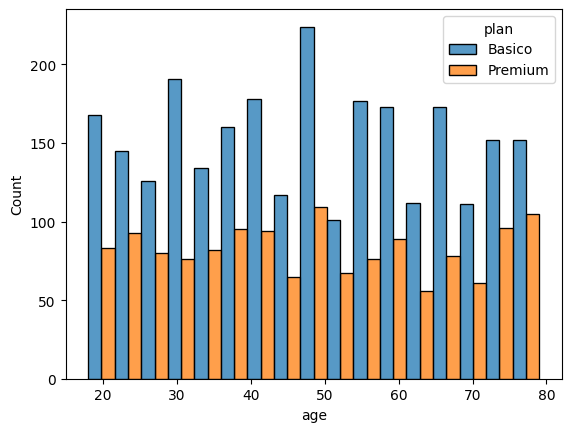

In [30]:
# Histograma para visualizar la edad (age)
sns.histplot(data=user_profile, x="age", hue="plan", multiple="dodge")
plt.show()

💡Insights: 
- Distribución es de una campana pero bastante plana, casi uniforme, se detecta la mayor demanda de ambos servicios entre los 48 y 50 años.

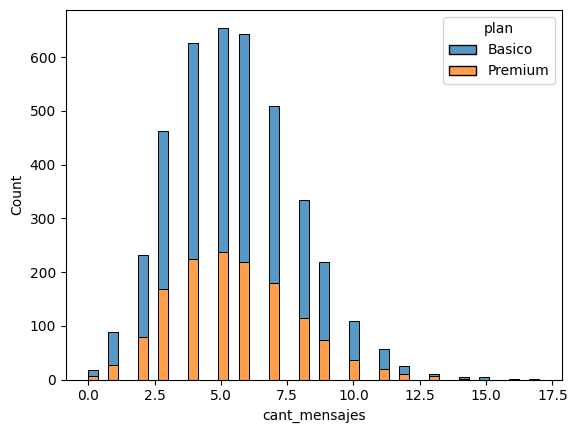

In [31]:
# Histograma para visualizar la cant_mensajes

sns.histplot(data=user_profile, x="cant_mensajes", hue="plan", multiple="stack")
plt.show()


💡Insights: 
-La distribución es de una campana normal con un sesgo ligero a la derecha, se detecta que la mayor frecuencia de mensajes es entre 5 y 6 mensajes en el periodo analizado.

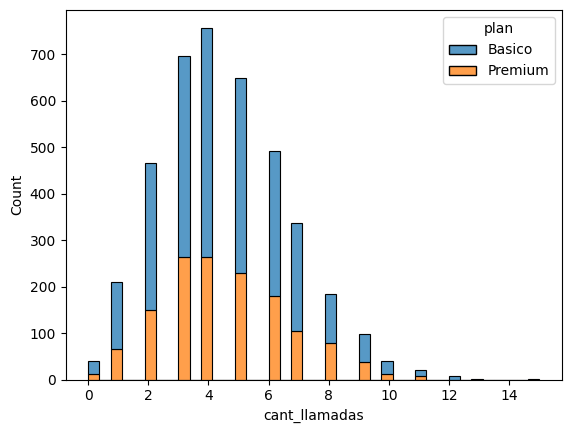

In [32]:
# Histograma para visualizar la cant_llamadas
sns.histplot(data=user_profile, x="cant_llamadas", hue="plan", multiple="stack")
plt.show()

💡Insights: 
 La distribución es de una campana normal con un sesgo ligero a la derecha, se detecta que la mayor frecuencia de llamadas es entre 3 y 4 llamadas, esto en el periodo analizado.

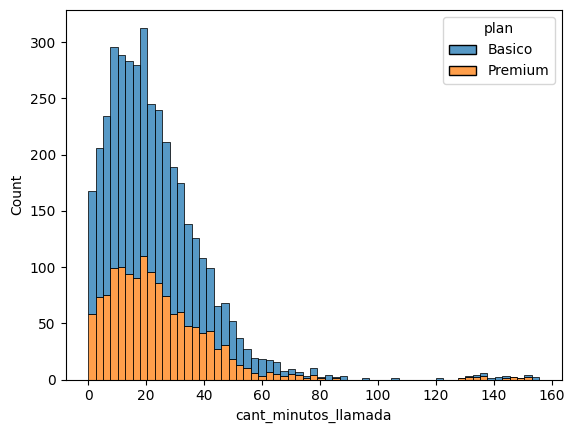

In [33]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(data=user_profile, x="cant_minutos_llamada", hue="plan", multiple="stack")
plt.show()

💡Insights: 
-  La distribución es de una campana normal con un mmarcado sesgo a la derecha, se detecta que la mayor frecuencia de minutos por llamadas es entre 10 y 20 minutos, esto en el periodo analizado.

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

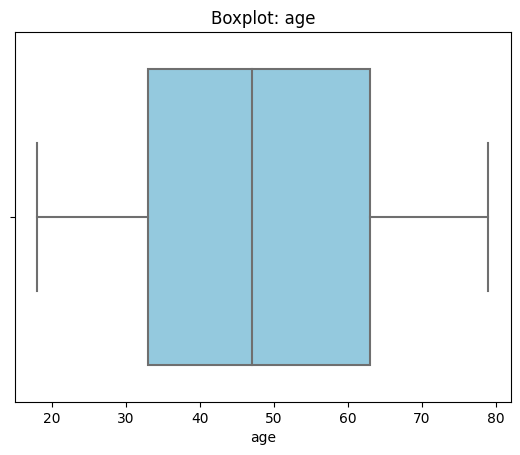

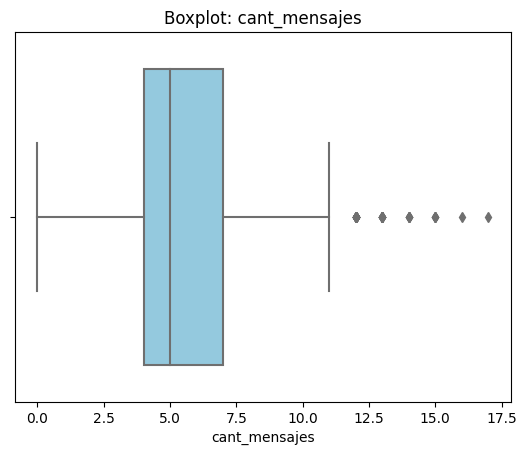

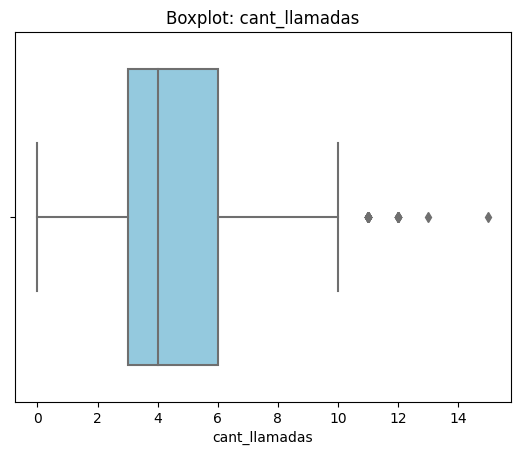

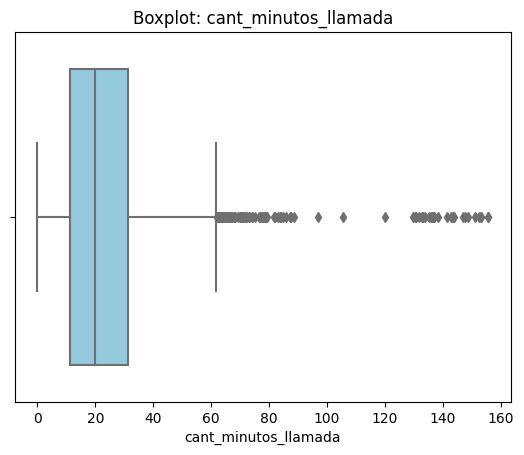

In [34]:
# Visualizando usando BoxPlot 
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_numericas:
    sns.boxplot(x=user_profile[col], color ='skyblue')
    plt.title(f'Boxplot: {col}')
    plt.show()

💡Insights:
- Age: No presenta outliers.
- cant_mensajes: Si presennta outliers solo a la derecha.
- cant_llamadas: Si presennta outliers solo a la derecha.
- cant_minutos_llamada: Si presennta outliers solo a la derecha.

In [35]:
# Calcular límites con el método IQR
columnas_limites = ['cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_limites:
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    print("limite superior para: ",col," : ",upper)




limite superior para:  cant_mensajes  :  11.5
limite superior para:  cant_llamadas  :  10.5
limite superior para:  cant_minutos_llamada  :  61.8575


In [36]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,3999.000000,3999.000000,3999.000000
mean,5.524381,4.478120,23.317054
std,2.358416,2.144238,18.168095
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.120000
50%,5.000000,4.000000,19.780000
75%,7.000000,6.000000,31.415000
max,17.000000,15.000000,155.690000


💡Insights: 
- cant_mensajes: mantener o no outliers, porqué? Si existen, pero se deben mantener ya que reflejan la realidad del consumo del servicio.
- cant_llamadas: mantener o no outliers, porqué? Si existen, pero se deben mantener ya que reflejan la realidad del consumo del servicio.
- cant_minutos_llamada: mantener o no outliers, porqué? Si existen, pero se deben mantener ya que reflejan la realidad del consumo del servicio.

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [37]:
# Crear columna grupo_uso
def clasifica_uso(row):
    llamadas = row["cant_llamadas"]
    mensajes = row["cant_mensajes"]

    # 1. Manejo de valores nulos/faltantes
    # pd.isna() verifica de forma robusta si el valor es NaN
    if pd.isna(llamadas) or pd.isna(mensajes):
        return "Error en Datos"

    # --- 2. Segmentación de Clienes por Uso ---
    if llamadas < 5 and mensajes < 5:
        return "Bajo Uso"
    elif llamadas < 10 and mensajes < 10:
        return "Uso medio"
    else:
        return "Alto uso"

# aplicar función y verificar cambios
user_profile["grupo_uso"] = user_profile.apply(clasifica_uso, axis=1)


In [38]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7,3,23.70,Uso medio
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5,10,33.18,Alto uso
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5,2,10.74,Uso medio
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11,3,8.99,Alto uso
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4,3,8.01,Bajo Uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [39]:
# Crear columna grupo_edad
def clasifica_edad(row):
    edad = row["age"]

    # 1. Manejo de valores nulos/faltantes
    # pd.isna() verifica de forma robusta si el valor es NaN
    if pd.isna(edad):
        return "Error en Datos"

    # --- 2. Segmentación de Clienes por edad ---
    if edad < 30:
        return "Joven"
    elif edad < 60:
        return "Adulto"
    else:
        return "Adulto mayor"

# aplicar función y verificar cambios
user_profile["grupo_edad"] = user_profile.apply(clasifica_edad, axis=1)


In [40]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso,grupo_edad
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7,3,23.70,Uso medio,Adulto
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5,10,33.18,Alto uso,Adulto
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5,2,10.74,Uso medio,Adulto
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11,3,8.99,Alto uso,Adulto mayor
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4,3,8.01,Bajo Uso,Adulto mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

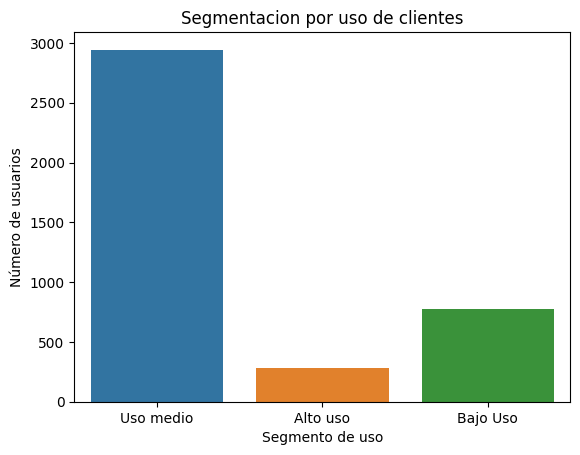

In [41]:
# Visualización de los segmentos por uso
sns.countplot(data=user_profile, x="grupo_uso")
plt.title("Segmentacion por uso de clientes")
plt.xlabel("Segmento de uso")
plt.ylabel("Número de usuarios")

plt.show()

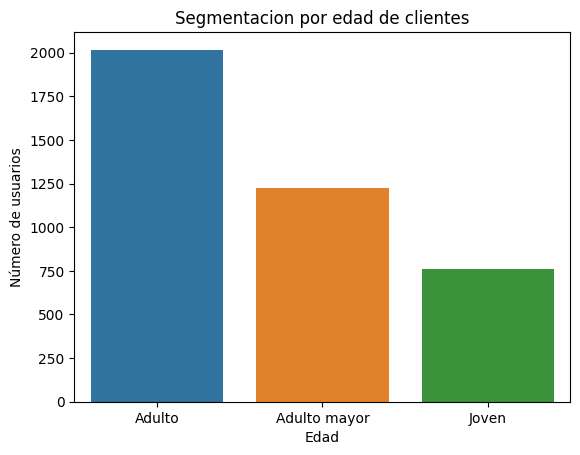

In [42]:
# Visualización de los segmentos por edad
sns.countplot(data=user_profile, x="grupo_edad")
plt.title("Segmentacion por edad de clientes")
plt.xlabel("Edad")
plt.ylabel("Número de usuarios")

plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
- Tabla users: la columna churn_date tiene 88% de valores nulos por lo que esta columna se ignora.
- Tabla users: la columna city tiene 11% de nulos, se reporta para su revisión, para efecto de este análisis la columna se ignora.
- Tabla usage: la columna "duration" tiene mas del 55 % de valores nulos y la columna "length" tiene mas del 44% de valores nulos pero son columnas excluyentes, ambos campos son tipo MAR, dado que debe tener valor uno u otro campo, según valor del campo type, por ejemplo si type = "call" el campo "duration" tiene valor y length es nulo, si type="text", el campo "length" tiene valor pero "duration" es nulo.
- La columna age de users tiene 55 valores sentinels .999, los cuuales se sustituyeron por la mediana.
- La columna `city` tiene 469 nulos y 96 valores sentinels "?" mismos que se asignará valor nulo, sumados representan el 14% del total de registros.
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
    - En users la reg_date si tiene años pasados (2022 u 2023) y claramente algunos registros con año erroneo 2026, mismos que se asigna valor nulo.
    - En usage.date hay 50 registros nulos.
- ¿Qué harías con ellas?
    - En user.reg_date Se usarian para el análisis, al menos que solo en especifico nos interesen los usuarios dados de alta en 2024.
    - En usage.date, dado que la información toda es de 2024, se pueden incluir en el análisis global o ignorar si segmentamos por mes.



🔍 **Segmentos por Edad**

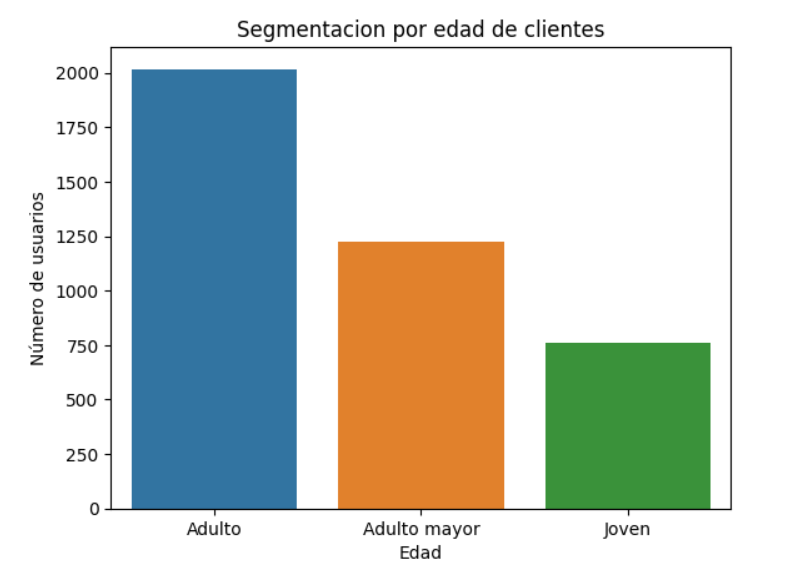

- Como se puede apreciar, los usuarios entre 30 y 60 años representan el 50% de nuestros clientes.
- El adulto mayor con aproximadamente el 30% y los jovenes menores de 30 años con el 20% 


📊 **Segmentos por Nivel de Uso**

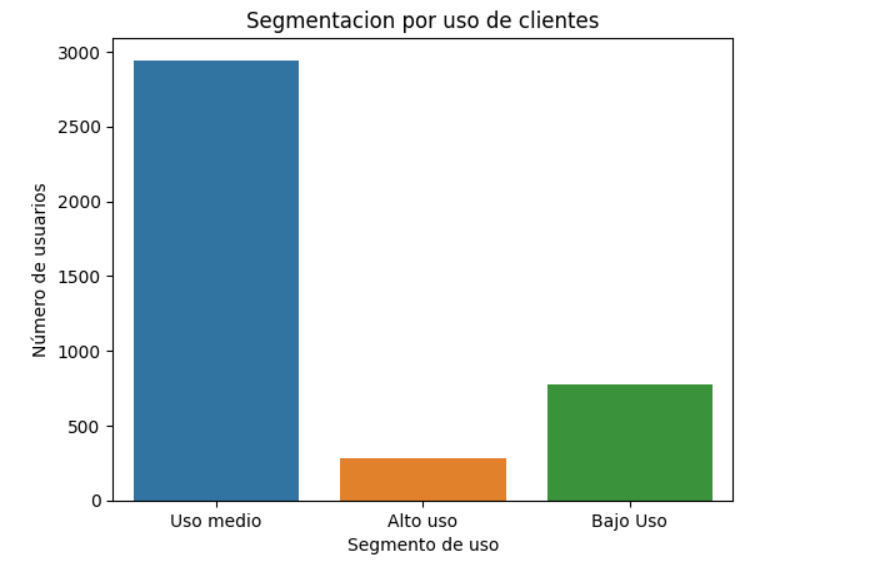

- El 75% de los usuarios, hacen un uso **medio** del servicio corresponde a menos de 10 llamadas y menos de 10 mensajesen en el periodo analizado.
- EL 18% de los usuarios, hacen un uso **bajo** del servicio corresponde a menos de 5 llamadas y menos de 5 mensajesen en el periodo analizado.
- EL 7% de los usuarios, hacen un uso **alto** del servicio corresponde a mas de 10 llamadas ó mas de 10 mensajesen en el periodo analizado.


➡️ Esto sugiere que ... 

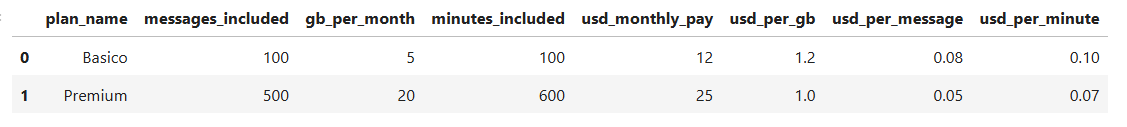  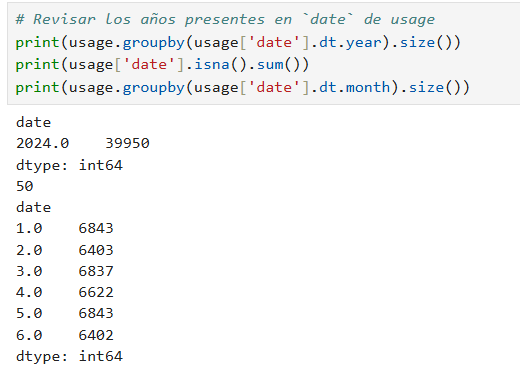

**Se sugiere confirmar con el área de sistemas** que se cuente con la información de 2024 completa, ya que solo se cuenta con información de los primeros seis meses y por otro lado si observamos la tabla de planes, dado el uso que han tenido los usuarios, con la información que se cuenta y ya acumulada por 6 meses, no se justifica que los usuarios tengan el plan **premium** pues con el plan **básico** pueden tener practicamente cuvierta su necesidad de servicio incluso si los acumulados reflejaran el uso en un solo mes. por lo que se tiene la sospecha de que falta información. 

Suponiendo que la información es completa y que efectivamente se quiere hacer un análisis solo de los primeros 6 meses, se hacen las siguientes recomendaciones:

💡 **Recomendaciones**
- **Al área de sistemas** se proporcionarn todas las observaciones sobre calidad que tienen los datos para evitarlos en las futuras fuentes de información que se generen, además de verificar como ya se menciono verificar si está la informmación completa.
- **Stakeholders y área de Mercadotécnia**
    -  Se propone elaborar una estratégia de mercado y mejores beneficios a los usuarios de entre 30 y 60 años, a fin de fortalecer este segmento de usuarios ya que representan el segmento mas fuerte con el 50%.
    -  Se propone implementar una campaña de difusión dirigida a la gente joven (menor de 30 años) ya es el segemento de población mas grande en latinoamericanos y es el segmento con menos usuarios de nuestro servicio.

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`

In [ ]:
https://github.com/43ferval-dotcom/An-lisis-ConnectaTel